#IMPORTS

In [6]:
#REALIZAMOS LOS IMPORTS PERTINENTES PARA CARGAR LOS DATASET Y MODELOS
import pandas as pd
import numpy as np
import math
import random
import sys
from itertools import permutations
import time
import matplotlib.pyplot as plt

#Cargamos nuestro dataset (entorno alojado)
from google.colab import drive
drive.mount('/content/drive/')

%cd drive/MyDrive/Universidad/BH/P2/

Mounted at /content/drive/
/content/drive/MyDrive/Universidad/BH/P2


# CARGAMOS Y VISUALIZAMOS LOS DATOS

In [7]:
#Descargamos los csv 


indices = './bicicletas/cercanas_indices.csv' 
kms = './bicicletas/cercanas_kms.csv' 
deltas = './bicicletas/deltas_5m.csv'

df_indices = pd.read_csv(indices)
df_kms = pd.read_csv(kms)
df_deltas = pd.read_csv(deltas)

df_deltas.iloc[1:] *= 2

In [8]:
print("***INDICES***")
df_indices = df_indices.to_numpy()
print(df_indices)
print(df_indices[5][2])

***INDICES***
[[ 0  7  4  6 10  8  1 12 15 11  5  2  9  3 14 13]
 [ 1 12  6 10  5  7  0 15  8 11  4  2  9  3 14 13]
 [ 2  9 11 15  3  5 12  8  6  1  7  0 10  4 14 13]
 [ 3  9  2 11  5 15 12  1  6  8 14  7 10 13  0  4]
 [ 4  0  7  8  6 10 15  1 12 11  5  2  9  3 14 13]
 [ 5 12  1 11  6 15  2  9  8 10  7  3  0  4 14 13]
 [ 6  1 12  7 10  0  8  5 15 11  4  2  9  3 14 13]
 [ 7  0 10  6  1  4  8 12 15  5 11  2  9  3 14 13]
 [ 8 15  6  0 11  7 12  4  1 10  5  2  9  3 14 13]
 [ 9  3  2 11  5 15 12  1  6  8  7 10  0  4 14 13]
 [10  7  6  1  0 12  4  8  5 15 11  2  9  3 14 13]
 [11 15  2  5 12  8  9  6  1  3  7  0 10  4 14 13]
 [12  5  1  6 15 11  7 10  8  0  2  9  4  3 14 13]
 [13 14  3  9  2  5 11 12 15  1  6  8 10  7  0  4]
 [14 13  3  9  2  5 11 12 15  1  6  8 10  7  0  4]
 [15 11  8 12  6  2  5  1  7  0  9 10  4  3 14 13]]
1


In [9]:
print("***KMS***")
df_kms = df_kms.to_numpy()
print(df_kms)

print(df_kms[1][1])

***KMS***
[[0.         0.46122758 0.71655698 0.93136219 0.9477276  1.06351864
  1.42129769 1.55876058 1.67533127 2.01893689 2.04341964 2.78876899
  3.20974316 3.83795985 7.17593159 7.58637037]
 [0.         0.5530186  0.59392116 0.8199783  0.92103396 1.00453464
  1.42129769 1.51124926 1.5791377  1.59078651 2.13485993 2.17315124
  2.31874603 2.92869393 6.03533468 6.45719995]
 [0.         0.66111819 0.7719908  1.14904395 1.16092089 1.34785215
  1.62399696 1.90642327 2.07576306 2.17315124 2.67622899 2.78876899
  2.84554235 3.2387435  4.58439543 4.96949473]
 [0.         0.63158184 1.16092089 1.88393315 2.00766735 2.27817668
  2.44357544 2.92869393 3.01707871 3.04182663 3.42512566 3.64814254
  3.7075951  3.81398897 3.83795985 4.35087455]
 [0.         0.71655698 1.16867873 1.34440671 1.61482766 1.61887735
  2.08973603 2.13485993 2.22053693 2.47429931 2.69072367 3.2387435
  3.73657019 4.35087455 7.74211391 8.14509473]
 [0.         0.48972237 0.92103396 1.00374731 1.12205292 1.16439317
  1.3478

La fila 1 de deltas es el numero inicial de bicicletas ocupadas en cada estación. La capacidad total de cada estación no la conocemos, debemos estudiarla nosotros.

Usaremos la primera fila del dataset deltas como un movimiento inicial que no cuenta kilómetros

Multiplicamos los movimientos de las bicicletas por 2

In [10]:
print("***MOVIMIENTOS***")
df_deltas


***MOVIMIENTOS***


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,5,7,13,6,8,13,8,9,6,10,10,18,8,13,15,14
1,0,0,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2
474,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
475,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
476,0,0,0,0,0,0,0,0,0,0,0,-6,0,0,0,0


In [11]:
#Sumamos todas las columnas de movimientos de delta para estimar un numero maximo de slots por estacion
deltas_np  = df_deltas.to_numpy()

print(deltas_np.shape)
dictsum = {}
for column in range(deltas_np.shape[1]):
  suma = 0
  for i in range(deltas_np.shape[0] ):
    #print("Accediendo a la posicion fila",i," columna",column)
    suma += deltas_np[i][column]
  
  dictsum[column] = suma

print(dictsum)

(478, 16)
{0: 5, 1: 7, 2: 19, 3: 16, 4: 2, 5: 19, 6: 0, 7: 3, 8: -4, 9: 12, 10: 2, 11: 18, 12: 12, 13: 15, 14: 17, 15: 10}


# DEFINICION DE CONSTANTES

In [12]:
semillas = [7777,8888]

num_estaciones = 16

max_cap_estaciones = 220

tamaño_sublista = [4,8,12,16]

# CREACION DEL DATAFRAME

In [13]:
df_results = pd.DataFrame()
df_results["Ev.Mejor"] = None
df_results["Ev.Media"] = None
df_results["Ev.Desv"] = None
df_results["Kms.Mejor"] = None
df_results["Kms.Media"] = None
df_results["Kms.Desv"] = None
df_results["tiempo"] = None

print(df_results)

Empty DataFrame
Columns: [Ev.Mejor, Ev.Media, Ev.Desv, Kms.Mejor, Kms.Media, Kms.Desv, tiempo]
Index: []


# DEFINICION DE FUNCIONES

## FUNCIONES P1

In [14]:
def quita_bicis(distancias,indices,deltas,estacion,cap_estaciones,dist_tot,num_estaciones):

#CASO QUITAR BICI

  #HAY BICIS, PERO NO SUFICIENTES PARA TODAS LAS QUE SE QUIEREN QUITAR
  if cap_estaciones[estacion] < abs(deltas[estacion]):
    sin_bici = abs(deltas[estacion]) - cap_estaciones[estacion]
    cap_estaciones[estacion] += deltas[estacion]
    
    if cap_estaciones[estacion] < 1:
      cap_estaciones[estacion] = 1

    #Si la estacion esta vacia y alguien quiere coger una bicicleta, tendrá que ir a la estacion más cercana andando (dist * 3)
    for pers in range(int(sin_bici)):
      for i in num_estaciones:
        #Compruebo la estacion mas cercana
        indice_cerc = indices[estacion][i]
        #print("Estacion mas cercana:", indice_cerc)
        if cap_estaciones[indice_cerc] == 0:
          continue

        else:
          #print(f"Bicis que meto/saco: {sin_bici}, capacidad estacion cercana {indice_cerc} es {cap_estaciones[indice_cerc]}, cap total de la estacion es {capmax_estaciones[indice_cerc]}")
          dist_cerc = distancias[estacion][i] * 3 
          dist_tot += dist_cerc
          cap_estaciones[indice_cerc] -= 1
          break
  #AUN HAY BICIS SUFICIENTES PARA QUITAR
  else:
    cap_estaciones[estacion] += deltas[estacion]

  return dist_tot,cap_estaciones

In [15]:
def mete_bicis(distancias,indices,deltas,estacion,cap_estaciones,capmax_estaciones,dist_tot,num_estaciones):

  
  if capmax_estaciones[estacion] < cap_estaciones[estacion] + abs(deltas[estacion]):
    sin_bici = (abs(deltas[estacion]) + cap_estaciones[estacion] ) - capmax_estaciones[estacion]
    cap_estaciones[estacion] += deltas[estacion]
    
    if cap_estaciones[estacion] > capmax_estaciones[estacion]:
      cap_estaciones[estacion] = capmax_estaciones[estacion]

    #Si la estacion esta llena y alguien quiere dejar una bicicleta, tendrá que ir a la estacion más cercana en bici (dist)
    for pers in range(int(sin_bici)):
      for i in num_estaciones:
        #Compruebo la estacion mas cercana
        indice_cerc = indices[estacion][i]
        #print("Estacion mas cercana:", indice_cerc)
        if capmax_estaciones[indice_cerc] == cap_estaciones[indice_cerc]:
          continue

        else:
          #print(f"Bicis que meto/saco: {sin_bici}, capacidad estacion cercana {indice_cerc} es {cap_estaciones[indice_cerc]}, cap total de la estacion es {capmax_estaciones[indice_cerc]}")
          dist_cerc = distancias[estacion][i] 
          dist_tot += dist_cerc
          cap_estaciones[indice_cerc] += 1
          break

  #AUN HAY BICIS SUFICIENTES PARA METER
  else:
    cap_estaciones[estacion] += deltas[estacion]

  
  return dist_tot,cap_estaciones

In [16]:
def primer_mov(indices,movimientos_ini,estacion,cap_estaciones,capmax_estaciones,num_estaciones):
  
  mov_ini = movimientos_ini.iloc[0,:].to_numpy()

  
  #Realizamos la resta o suma de bicicletas en las estaciones
  sin_bici = 0

    #HAY HUECOS, PERO NO SUFICIENTES PARA TODAS LAS BICIS QUE SE QUIEREN DEJAR (TENER EN CUENTA cap_estaciones)
  
  if capmax_estaciones[estacion] < cap_estaciones[estacion] + abs(mov_ini[estacion]):
    sin_bici = (abs(mov_ini[estacion]) + cap_estaciones[estacion] ) - capmax_estaciones[estacion]
    cap_estaciones[estacion] += mov_ini[estacion]
    
    if cap_estaciones[estacion] > capmax_estaciones[estacion]:
      cap_estaciones[estacion] = capmax_estaciones[estacion]

  #Si la estacion esta llena y alguien quiere dejar una bicicleta, tendrá que ir a la estacion más cercana en bici (dist)
    for pers in range(int(sin_bici)):
      for i in num_estaciones:
        #Compruebo la estacion mas cercana
        indice_cerc = indices[estacion][i]
        #print("Estacion mas cercana:", indice_cerc)
        if capmax_estaciones[indice_cerc] == cap_estaciones[indice_cerc]:
          continue

        else:
          #print(f"Bicis que meto/saco: {sin_bici}, capacidad estacion cercana {indice_cerc} es {cap_estaciones[indice_cerc]}, cap total de la estacion es {capmax_estaciones[indice_cerc]}")
          cap_estaciones[indice_cerc] += 1
          break

  #AUN HAY BICIS SUFICIENTES PARA METER
  else:
    cap_estaciones[estacion] += mov_ini[estacion]

  return cap_estaciones

In [17]:
###Comprobar personas sin bici hace bien la cuenta

def func_evaluacion(solucion,indices,distancias,movimientos_ini):
  
  dist_tot = 0

  num_estaciones = list(range(1,16))

  capmax_estaciones = solucion

  cap_estaciones = [0] * 16

  #CREAMOS EL PRIMER MOVIMIENTO, QUE NO GASTA KMS
  for estacion in range(16):
    cap_estaciones = primer_mov(indices,movimientos_ini,estacion,cap_estaciones,capmax_estaciones,num_estaciones)


  #Pasamos el dataframe a numpy para trabajar de forma mas óptima
  movimientos = movimientos_ini.iloc[1:].to_numpy()


  #Recorremos la matriz de movimientos y evaluamos

  for deltas in movimientos:
    #print(f"fila de movimientos: {deltas}")
    mov = np.where(deltas != 0)
    mov = np.asarray(mov)
    mov = mov[0]
    #print(f"fila de movimientos postprocesado: {mov}")

    for estacion in mov:
      #Realizamos la resta o suma de bicicletas en las estaciones
      sin_bici = 0
      #print("capacidad estaciones: ",cap_estaciones)
      #print("estacion",estacion," ,movimiento:",deltas[estacion])

      #CASO QUITAR BICI
      if deltas[estacion] < 0:

        #HAY BICIS, PERO NO SUFICIENTES PARA TODAS LAS QUE SE QUIEREN QUITAR
        dist_tot,cap_estaciones = quita_bicis(distancias,indices,deltas,estacion,cap_estaciones,dist_tot,num_estaciones)


      #CASO DEJAR BICI
      else:

        #HAY HUECOS, PERO NO SUFICIENTES PARA TODAS LAS BICIS QUE SE QUIEREN DEJAR (TENER EN CUENTA cap_estaciones)
        dist_tot,cap_estaciones = mete_bicis(distancias,indices,deltas,estacion,cap_estaciones,capmax_estaciones,dist_tot,num_estaciones)
        
  return dist_tot

In [18]:
def func_fitness(solucion,indices,distancias,movimientos_ini):
  
  dist_tot = 0

  num_estaciones = list(range(1,16))

  capmax_estaciones = solucion

  cap_estaciones = [0] * 16

  #CREAMOS EL PRIMER MOVIMIENTO, QUE NO GASTA KMS
  for estacion in range(16):
    cap_estaciones = primer_mov(indices,movimientos_ini,estacion,cap_estaciones,capmax_estaciones,num_estaciones)


  #Pasamos el dataframe a numpy para trabajar de forma mas óptima
  movimientos = movimientos_ini.iloc[1:].to_numpy()


  #Recorremos la matriz de movimientos y evaluamos

  for deltas in movimientos:
    #print(f"fila de movimientos: {deltas}")
    mov = np.where(deltas != 0)
    mov = np.asarray(mov)
    mov = mov[0]
    #print(f"fila de movimientos postprocesado: {mov}")

    for estacion in mov:
      #Realizamos la resta o suma de bicicletas en las estaciones
      sin_bici = 0
      #print("capacidad estaciones: ",cap_estaciones)
      #print("estacion",estacion," ,movimiento:",deltas[estacion])

      #CASO QUITAR BICI
      if deltas[estacion] < 0:

        #HAY BICIS, PERO NO SUFICIENTES PARA TODAS LAS QUE SE QUIEREN QUITAR
        dist_tot,cap_estaciones = quita_bicis(distancias,indices,deltas,estacion,cap_estaciones,dist_tot,num_estaciones)


      #CASO DEJAR BICI
      else:

        #HAY HUECOS, PERO NO SUFICIENTES PARA TODAS LAS BICIS QUE SE QUIEREN DEJAR (TENER EN CUENTA cap_estaciones)
        dist_tot,cap_estaciones = mete_bicis(distancias,indices,deltas,estacion,cap_estaciones,capmax_estaciones,dist_tot,num_estaciones)
        
  return dist_tot

In [19]:
def crea_estaciones_random():


  sol_ini = [random.randint(1,9) for _ in range(num_estaciones)]

  #print("Lista inicial: ",sol_ini)

  factor = 220 / sum(sol_ini)

  sol_ini = np.multiply(sol_ini,factor)

  sol_ini = np.round(sol_ini)

  #print("Lista inicial procesada: ",sol_ini)

  suma_est = sum(sol_ini)

  #print("total de estaciones: ", suma_est)

  if suma_est > 220:
    #Quitamos estaciones de la que tenga mas
    max_bicis = max(sol_ini)
    est_max = np.where(sol_ini == max_bicis)
    est_max = np.asarray(est_max)
    est_max = est_max[0][0]

    quitar = suma_est - 220
    sol_ini[est_max] = sol_ini[est_max] - quitar
    #print("lista con 220: ",sol_ini)

  #print("Array de estaciones: ", sol_ini)

  return sol_ini

In [20]:
#Operador de movimiento

def get_vecino(sol_act,movimientos,granularidad):
  
  if len(movimientos) <= 0:

    return None

  else:
    
    #Movimientos de origen a destino

    orig,dest = movimientos.pop(0)

    vecino = sol_act.copy()

    #Comprobamos que el cambio es correcto

    if vecino[orig] <= granularidad: #no hay suficientes estaciones
      
      for i in range(granularidad):

        if vecino[orig] == 1:
          #Lista de los valores mayores que 1
          mayor_uno = [num for num in vecino if num > 1]
          #Encuentro el siguiente numero de menos estaciones
          index_min = list(vecino).index(min(mayor_uno))
          vecino[dest] += 1
          vecino[index_min] -= 1
          
        else:
          vecino[dest] += 1
          vecino[orig] = 1

    else:
      vecino[orig] -= granularidad
      vecino[dest] += granularidad

    return vecino



In [21]:
def op_mov(sol_act,movimientos,granularidad):
  
  if len(movimientos) <= 0:

    return None

  else:
    
    #Movimientos de origen a destino

    orig = movimientos[0]
    dest = movimientos[1]

    vecino = sol_act.copy()

    #Comprobamos que el cambio es correcto

    if vecino[orig] <= granularidad: #no hay suficientes estaciones
      
      for i in range(granularidad):

        if vecino[orig] == 1:
          #Lista de los valores mayores que 1
          mayor_uno = [num for num in vecino if num > 1]
          #Encuentro el siguiente numero de menos estaciones
          index_min = list(vecino).index(min(mayor_uno))
          vecino[dest] += 1
          vecino[index_min] -= 1
          
        else:
          vecino[dest] += 1
          vecino[orig] = 1

    else:
      vecino[orig] -= granularidad
      vecino[dest] += granularidad

    return vecino

In [22]:
def genera_vecino(sol, k):

    neighbor = sol.copy()
    
    # Indice aleatorio desde el que empezaremos
    index = np.random.randint(num_estaciones)
    # print(f'indice: {index}')
    
    s = tamaño_sublista[k-1]
    # print(f'tamaño sublista: {s}')

    if s == num_estaciones:
        np.random.shuffle(neighbor)
    else:
        sublist = np.zeros(s)

        # items selection
        index_aux = index
        for i in range(s):
            sublist[i] = sol[index_aux % num_estaciones]
            index_aux += 1
        
        # print(sublist)
        np.random.shuffle(sublist)
        # print(sublist)

        # modify neighbor
        index_aux = index
        for i in range(s):
            neighbor[index_aux % num_estaciones] = sublist[i]
            index_aux += 1
    
    return neighbor

## FUNCIONES P2

### AG Básico

In [23]:
#func_fitness = func_evaluacion * factor si num_estaciones > 220

def func_fitness(solucion):

  factor = 10
  estaciones_extra = sum(solucion) - 220

  if(estaciones_extra > 0):
    fitness = func_evaluacion(solucion.copy(),df_indices.copy(), df_kms.copy(), df_deltas.copy()) + factor*estaciones_extra
  else:
    fitness = func_evaluacion(solucion.copy(),df_indices.copy(), df_kms.copy(), df_deltas.copy())

  return fitness

In [24]:
def sel_torneo(pob, cost_pob, k):

  k_torneo = math.ceil(k * len(pob))

  ind_torneo = random.sample(range(len(pob)),k_torneo)
  pob_torneo = pob[ind_torneo]
  cost_pob_torneo = cost_pob[ind_torneo]
  
  #devolvemos padres
  ind_padres = np.argsort(cost_pob_torneo)[0:2]
  padres = pob_torneo[ind_padres]


  return padres

In [43]:
#Cruce en dos puntos 
#Realizaremos una seleccion circular en la que, dependiendo de una probabilidad del 50%,
#escogeremos los valores de dentro o de fuera del rango que ha sido elegido

def cruce(padres):
  ini = np.random.randint(0,6)
  fin = np.random.randint(8,12)

  individuo = padres[0]

  #lista circular
  if random.random() < 0.5:
    individuo[0:ini] = padres[1][0:ini]
    individuo[fin:len(individuo)] = padres[1][fin:len(padres[1])]

  else:
    individuo[ini:fin] = padres[1][ini:fin]

  #Los individuos deben estar por encima de 205 plazas
  if(sum(individuo) < 205): 

    factor = 205 / sum(individuo)
    
    individuo = individuo * factor

    individuo = np.round(individuo)
  
  return individuo

In [26]:
def cruce_v2(padres):
  inicio = np.random.randint(0,10)
  fin = (inicio+5) 

  individuo = padres[0]
  individuo[inicio:fin] = padres[1][inicio:fin]

  #Controlamos que el numero de estaciones no baje de 205.
  if(sum(individuo) < 205): 
    faltaHuecos = 205 - sum(individuo)
    añadir = np.ceil(faltaHuecos/5)
    for j in range(5):
      pos = inicio +j 
      individuo[pos] += añadir
  
  return individuo

In [27]:
def mutacion(ind, granularidad):

  posiciones = random.sample(range(15),2)
  
  mutado = op_mov(ind, posiciones, granularidad)

  return mutado

### AG CHC

In [28]:
def restart_pob(pob):

  aux_cont_fitness = 0

  #Calculamos los costes de la poblacion
  cost_pob = np.zeros(len(pob))

  for i in range(len(pob)):
    cost_pob[i] = func_fitness(pob[i])
    aux_cont_fitness += 1

  #Escogemos al mejor
  ind_mejor = np.argsort(cost_pob)[0] 
  mejor = pob[ind_mejor]

  #Creamos la poblacion inicial:

  #Tamaño pob. Inicial: Entre 15 y 30 individuos

  new_pob = np.empty((len(pob), num_estaciones), int)

  for i in range(len(pob)):
    ind = crea_estaciones_random()
    new_pob[i] = ind

  for i in range(5):
    new_pob[i] = mejor # Hacemos mas copias del mejor

  return new_pob, aux_cont_fitness


In [29]:
def check_pob_igual(pob1, pob2):
  
  aux_cont_fitness = 0

  #Calculamos los costes de la pob1
  cost_pob1 = np.zeros(len(pob1))
  
  for i in range(len(pob1)):
    cost_pob1[i] = func_fitness(pob1[i])
    aux_cont_fitness += 1

  #Calculamos los costes de la pob1
  cost_pob2 = np.zeros(len(pob2))

  for i in range(len(pob1)):
    cost_pob2[i] = func_fitness(pob2[i])
    aux_cont_fitness += 1

  cost_pob1 = np.sort(np.round(cost_pob1))
  cost_pob2 = np.sort(np.round(cost_pob2))

  return np.array_equal(cost_pob1,cost_pob2), aux_cont_fitness


In [30]:
def check_dist_hamming(padre1,padre2,d):
  dist = 0

  for i in range(len(padre1)):
    if(padre1[i] != padre2[i]):
      dist+=1

  return dist > d

In [31]:
def dist_hamming(padre1,padre2):
  dist = 0

  for i in range(len(padre1)):
    if(padre1[i] != padre2[i]):
      dist+=1

  return dist

In [32]:
def cruce_CHC(padre1, padre2): #PARENT CENTERED
  
  dist_gen = []
  desviacion = 2

  #Posiciones distintas
  for i in range(len(padre1)): 
    if(padre1[i] != padre2[i]):
      dist_gen.append(i)

  dist_gen = np.array(dist_gen)
  np.random.shuffle(dist_gen)

  hijo1 = np.copy(padre1)
  hijo2 = np.copy(padre2)

  mitad = int(len(dist_gen)/2)

  for i in range(mitad):

    #Mutacion gaussiana del valor
    hijo1_gen = round(random.gauss(padre2[dist_gen[i]], desviacion))
    hijo2_gen = round(random.gauss(padre1[dist_gen[mitad+i]], desviacion))

    #Valores siempre mayores que 1
    if hijo1_gen < 1:
       hijo1_gen = 1

    if hijo2_gen < 1:
       hijo2_gen = 1

    hijo1[dist_gen[i]] = hijo1_gen
    hijo2[dist_gen[mitad + i]] = hijo2_gen

  #La solucion debe tener mas de 205 estaciones
  if (sum(hijo1) < 205):
    fact = 205 / sum(hijo1)
    hijo1 = np.ceil(hijo1*fact)
  if (sum(hijo2) < 205 ):   
    fact = 205 / sum(hijo2)
    hijo2 = np.ceil(hijo2*fact)
                       
  return hijo1, hijo2

### AG Multimodal

In [33]:
def clearing(Poblacion,Fitness,kappa,radio):

  #Ordenamos de mejor a peor
  coste_ordenado = sorted(Fitness)
  ind_pob_ord = np.argsort(coste_ordenado)
  pob_ordenada = pob[ind_pob_ord]


  for i in range(len(pob_ordenada)):

    if coste_ordenado[i] < 999:
    
      NumGanadores=1
    
      for j in range(i,len(pob_ordenada)):
    
        if coste_ordenado[j] < 999 and dist_hamming(pob_ordenada[j],pob_ordenada[i]) < radio:
    
          if NumGanadores <  kappa:
            NumGanadores+=1
    
          else:
            coste_ordenado[j] = 999

  print("pob clearing: ",pob_ordenada)
  print("coste clearing",coste_ordenado)


  return pob_ordenada, np.array(coste_ordenado)

In [34]:
def clearing_v2(Poblacion,Fitness,kappa,radio):

  #Ordenamos de mejor a peor
  coste_ordenado = sorted(Fitness)
  ind_pob_ord = np.argsort(coste_ordenado)
  pob_ordenada = pob[ind_pob_ord]


  for i in range(len(pob_ordenada)):

    if coste_ordenado[i] < 999:
    
      NumGanadores=1
    
      for j in range(i,len(pob_ordenada)):
    
        if coste_ordenado[j] < 999 and dist_hamming(pob_ordenada[j],pob_ordenada[i]) < radio:
    
          if NumGanadores <  kappa:
            NumGanadores+=1
    
          else:
            coste_ordenado[j] = 999

  pob_final = []
  coste_final = []

  for i in range(len(pob_ordenada)):
    if(coste_ordenado[i] != 999):
      pob_final.append(pob_ordenada[i])
      coste_final.append(coste_ordenado[i])

  print("pob clearing: ",pob_final)
  print("coste clearing",coste_final)

  return np.array(pob_final), np.array(coste_final)

# DEFINICION DE ALGORITMOS



## BUSQUEDA LOCAL

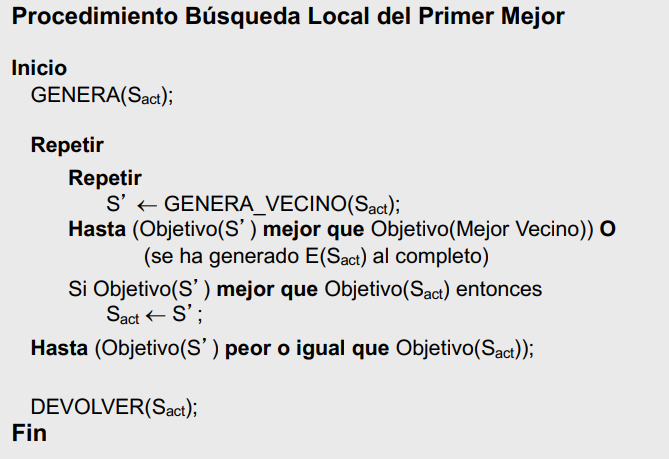

In [35]:
def busqueda_local(semilla,granularidad,sol_inicial = None):

    #Fijamos la semilla
    random.seed(semilla)

    contador_coste = 0

    if sol_inicial is None:
      sol_act = crea_estaciones_random()
    else:
      sol_act = sol_inicial

    coste_act = func_evaluacion(sol_act.copy(),df_indices.copy(), df_kms.copy(), df_deltas.copy())
    contador_coste += 1

    #obtenemos todos los vecinos posibles de nuestra solucion inicial

    #Lista de posibles movimientos (permutaciones)
    movimientos = permutations(range(16),2)
    movimientos = list(movimientos)
    #print("Num movimientos posibles:",len(movimientos))
  
    
    while True:
      
      random.shuffle(movimientos)
      sol_vecino = get_vecino(sol_act,movimientos.copy(),granularidad)

      while sol_vecino is not None:

        coste_vecino = func_evaluacion(sol_vecino.copy(), df_indices.copy(), df_kms.copy(), df_deltas.copy())
        contador_coste += 1
        #print("Coste act:",coste_act,"coste vecino:", coste_vecino)

        if coste_act > coste_vecino:
          sol_act = sol_vecino
          coste_act = coste_vecino
          break

        else:
          sol_vecino = get_vecino(sol_act,movimientos,granularidad)

      if sol_vecino is None or contador_coste >= 3000:
        break

    dictcost_est["sol"] = sol_act.copy()
    dictcost_est["coste"] = coste_act.copy()
    dictcost_est["num_ev"] = contador_coste

    return dictcost_est

In [36]:
## V2

#Generamos una primera solucion aleatoria

dictcost_est = {}
dictsem = {}

granularidades = [4]

ini_bl  = time.time()

for semilla in semillas:
  random.seed(semilla)

  for granularidad in granularidades:

    dictcost_est = busqueda_local(semilla,granularidad)


  dictsem[semilla] = dictcost_est.copy()

fin_bl  = time.time()

time_bl = fin_bl - ini_bl

print(dictsem)


{7777: {'sol': array([10., 12., 16., 17., 15., 16., 11., 15., 15., 15., 14., 27.,  3.,
        5., 17., 12.]), 'coste': 393.6002949794886, 'num_ev': 271}, 8888: {'sol': array([12., 13., 16., 17., 16., 13., 13., 12., 12., 16., 13., 25.,  3.,
        8., 13., 15.]), 'coste': 419.1949091293104, 'num_ev': 267}}


In [37]:
#Guardamos los valores en el dataframe

costes = []
evaluaciones = []

for coste_ev in dictsem.values():
  costes.append(coste_ev["coste"])
  evaluaciones.append(coste_ev["num_ev"])

mejor_coste = min(costes)
mejor_ev = min(evaluaciones)

media_coste = np.mean(costes)
media_ev = np.mean(evaluaciones)

desv_coste = np.std(costes)
desv_ev = np.std(evaluaciones)

df_results.loc["Busqueda Local"] = [mejor_ev,media_ev,desv_ev,mejor_coste,media_coste,desv_coste,time_bl]

print(df_results)

                Ev.Mejor  Ev.Media  Ev.Desv   Kms.Mejor   Kms.Media  \
Busqueda Local     267.0     269.0      2.0  393.600295  406.397602   

                 Kms.Desv    tiempo  
Busqueda Local  12.797307  5.212463  


## VNS

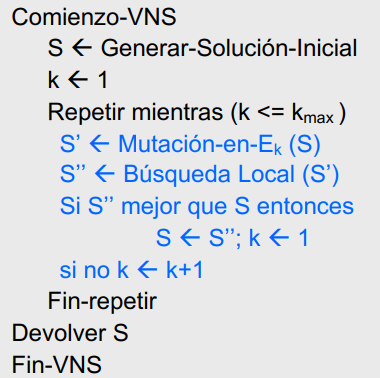

In [38]:
#Generamos una primera solucion aleatoria

dictcost_est = {}
dictsem = {}

ini_vns = time.time()

for semilla in semillas:
  
  contador_coste = 0
  random.seed(semilla)

  sol_act = crea_estaciones_random()
  coste_act = func_evaluacion(sol_act.copy(),df_indices.copy(), df_kms.copy(), df_deltas.copy())
  contador_coste  += 1

  k = 1
  s = 4
  kmax = 4

  bl = 0
  blmax = 20 # criterio de salida. Calcular en funcion de la experimentacion (valor experimental)

  while k <= kmax and bl <= blmax:

    vecino = genera_vecino(sol_act,k)

    dictsol = busqueda_local(
        semilla,
        granularidad,
        vecino
    )

    candidate_sol = dictsol["sol"]
    candidate_sol_cost = dictsol["coste"]
    contador_coste += dictsol["num_ev"]

    bl += 1
    print(f'num. bl: {bl}')

    if candidate_sol_cost < coste_act:
        print(f'mejor')
        print(f'Coste anterior: {coste_act}')
        print(f'Coste actual: {candidate_sol_cost}')
        sol_act      = candidate_sol
        coste_act = candidate_sol_cost

        k = 1
    else:
        print('peor')
        k += 1

  print(coste_act)
  print(sol_act)

  dictcost_est["coste"] = coste_act.copy()
  dictcost_est["num_ev"] = contador_coste

  dictsem[semilla] = dictcost_est.copy()

fin_vns = time.time()

time_vns = fin_vns - ini_vns

print(dictsem)

num. bl: 1
mejor
Coste anterior: 688.0720167887331
Coste actual: 393.3664218057052
num. bl: 2
peor
num. bl: 3
peor
num. bl: 4
mejor
Coste anterior: 393.3664218057052
Coste actual: 386.14560804446467
num. bl: 5
mejor
Coste anterior: 386.14560804446467
Coste actual: 382.47792465597206
num. bl: 6
peor
num. bl: 7
peor
num. bl: 8
peor
num. bl: 9
peor
382.47792465597206
[14. 12. 15. 15. 17. 16. 13. 12. 13. 14. 11. 27.  3. 19.  7. 12.]
num. bl: 1
mejor
Coste anterior: 695.6590218431783
Coste actual: 425.7211440495763
num. bl: 2
mejor
Coste anterior: 425.7211440495763
Coste actual: 420.24298871880495
num. bl: 3
peor
num. bl: 4
peor
num. bl: 5
peor
num. bl: 6
peor
420.24298871880495
[12. 13. 16. 17. 16. 13. 12. 12. 13. 12. 13. 25.  3.  8. 17. 15.]
{7777: {'sol': array([11., 13., 12., 28., 20., 15., 15., 10., 13., 11., 12., 27.,  2.,
       11.,  5., 15.]), 'coste': 382.47792465597206, 'num_ev': 2329}, 8888: {'sol': array([13., 12., 15., 17., 15., 16., 13., 12., 13., 13., 12., 25.,  4.,
       1

In [39]:
costes = []
evaluaciones = []

for coste_ev in dictsem.values():
  costes.append(coste_ev["coste"])
  evaluaciones.append(coste_ev["num_ev"])

mejor_coste = min(costes)
mejor_ev = min(evaluaciones)

media_coste = np.mean(costes)
media_ev = np.mean(evaluaciones)

desv_coste = np.std(costes)
desv_ev = np.std(evaluaciones)

df_results.loc["VNS"] = [mejor_ev,media_ev,desv_ev,mejor_coste,media_coste,desv_coste,time_vns]

print(df_results)

                Ev.Mejor  Ev.Media  Ev.Desv   Kms.Mejor   Kms.Media  \
Busqueda Local     267.0     269.0      2.0  393.600295  406.397602   
VNS               1558.0    1943.5    385.5  382.477925  401.360457   

                 Kms.Desv     tiempo  
Busqueda Local  12.797307   5.212463  
VNS             18.882532  34.420949  


## ALGORITMO GENETICO BASICO



Modalidad:


*   Estacionario/Generacional (elite 5 individuos)

Operadores:

* Mutacion: 5% a 20% de genes cambiados en cada cruce
* Pob. Inicial: 15 a 30 individuos
* Cruce: Corte en dos puntos
* Cromosoma: Misma representacion
* Fitness: Func_ev + factor*num_plazas
* Selección: Torneo, Ruleta Proporcional (si estacionario)
* Reemplazo: (Solo si estacionario), torneo/aleatorio




In [50]:
#Algoritmos genetico basico generacional (Elitismo de 5 individuos)
dictcost_est = {}
dictsem = {}

ini_ag_basic = time.time()

for semilla in semillas:

  print("***SEMILLA",semilla,"***")

  random.seed(semilla)

  contador_fitness = 0
  hist_media = []
  hist_mejor = []

  # Definimos los operadores

  generaciones = 200
  #prob_mut = random.uniform(0.05,0.2)
  prob_mut = 0.1
  granularidad = 3
  K = 0.1


  #Creamos la poblacion inicial:

  #Tamaño pob. Inicial: Entre 15 y 30 individuos
  #pob_inicial = random.randint(15,30)
  pob_inicial = 30

  pob = np.empty((pob_inicial, num_estaciones), int)

  for i in range(pob_inicial):
    ind = crea_estaciones_random()
    pob[i] = ind


  #Calculamos los costes de la poblacion
  cost_pob = np.zeros(len(pob))

  for i in range(len(pob)):
    cost_pob[i] = func_fitness(pob[i])
    contador_fitness += 1


  for i in range(generaciones):
    #print("Gen: " + str(i + 1))
    #print("Mejores costes: ",np.sort(cost_pob)[0:5])

    #Seleccionamos la elite:
    ind_elite = np.argsort(cost_pob)[0:5] #elite de 5 individuos
    elite = pob[ind_elite]
    #print("Mejor solucion:",pob[np.argsort(cost_pob)[0]]," con suma de estaciones ", sum(pob[np.argsort(cost_pob)[0]]))

    #Añadimos la media de valores y el mejor valor
    hist_mejor.append(min(cost_pob))
    hist_media.append(np.mean(cost_pob))


    #Generamos la nueva poblacion:
    new_pob = np.copy(pob)
    new_pob[0:5] = elite 

    for i in range(len(pob) - 5):

      #Realizamos la seleccion por torneo
      ganador = sel_torneo(pob, cost_pob, K)

      #Operador de cruce
      hijo = cruce(ganador)

      #Mutacion
      if(np.random.random() < prob_mut): 
        hijo = mutacion(hijo, granularidad)

      new_pob[i+5] = hijo

    pob = np.copy(new_pob)
    cost_pob = np.zeros(len(pob))
    for i in range(len(pob)):
      cost_pob[i] = func_fitness(pob[i])
      contador_fitness += 1

   
  ind_mejor = np.argsort(cost_pob)[0] 
  mejor = pob[ind_mejor]
  dictcost_est["sol"] = mejor.copy()
  dictcost_est["coste"] = min(cost_pob)
  dictcost_est["num_ev"] = contador_fitness
  dictcost_est["hist_mejor"] = hist_mejor
  dictcost_est["hist_media"] = hist_media

  dictsem[semilla] = dictcost_est.copy()

fin_ag_basic = time.time()

time_ag_basic = fin_ag_basic - ini_ag_basic

print(dictsem)


***SEMILLA 7777 ***
***SEMILLA 8888 ***
{7777: {'sol': array([12, 13, 22, 16, 19, 13, 12, 12, 15, 26, 14, 31,  3,  7,  4,  8]), 'coste': 405.9104850964489, 'num_ev': 6030, 'hist_mejor': [550.1476928545444, 538.3519190745808, 527.6509179104714, 486.36732019878133, 463.5911371436797, 463.5911371436797, 463.5911371436797, 449.56318807175575, 449.56318807175575, 449.56318807175575, 445.56687255711586, 444.9854864083906, 432.63456956101436, 431.0808643648187, 431.0808643648187, 431.0808643648187, 429.2038947943906, 429.2038947943906, 429.2038947943906, 423.13054643742635, 423.13054643742635, 423.13054643742635, 419.81519497781414, 419.81519497781414, 415.90982903105595, 415.90982903105595, 415.90982903105595, 415.3089388698658, 411.63762983997174, 411.63762983997174, 411.63762983997174, 411.63762983997174, 411.63762983997174, 411.63762983997174, 411.63762983997174, 411.63762983997174, 410.81519616501595, 410.81519616501595, 410.81519616501595, 410.81519616501595, 410.81519616501595, 410.815

In [51]:
costes = []
evaluaciones = []

for coste_ev in dictsem.values():
  costes.append(coste_ev["coste"])
  evaluaciones.append(coste_ev["num_ev"])

mejor_coste = min(costes)
mejor_ev = min(evaluaciones)

media_coste = np.mean(costes)
media_ev = np.mean(evaluaciones)

desv_coste = np.std(costes)
desv_ev = np.std(evaluaciones)

df_results.loc["AG Basico"] = [mejor_ev,media_ev,desv_ev,mejor_coste,media_coste,desv_coste,time_ag_basic]

print(df_results)

                Ev.Mejor  Ev.Media  Ev.Desv   Kms.Mejor   Kms.Media  \
Busqueda Local     267.0     269.0      2.0  393.600295  406.397602   
VNS               1558.0    1943.5    385.5  382.477925  401.360457   
AG Basico         6030.0    6030.0      0.0  375.052743  390.481614   

                 Kms.Desv     tiempo  
Busqueda Local  12.797307   5.212463  
VNS             18.882532  34.420949  
AG Basico       15.428871  96.894734  


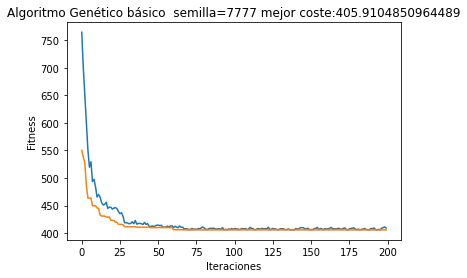

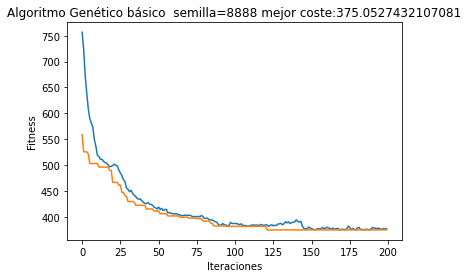

In [52]:
#Realizamos el plot de los valores historicos
for semilla in semillas:

  media = dictsem[semilla]["hist_media"]
  mejor = dictsem[semilla]["hist_mejor"]

  x = [i for i in range(len(media))]
  plt.plot(x,media, label = "media de costes")
  plt.plot(x,mejor, label = "mejor coste")
  plt.xlabel('Iteraciones')
  plt.ylabel('Fitness')
  plt.title('Algoritmo Genético básico '+' semilla='+str(semilla) + ' mejor coste:' + str(min(mejor)))
  plt.show()

In [ ]:
random.uniform(0.05,0.2)

0.07724137185219891

## ALGORITMO GENETICO CHC

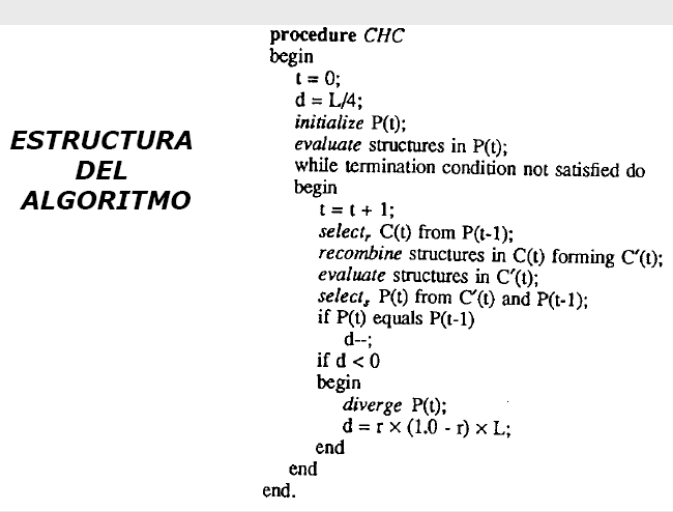

In [ ]:
#Algoritmo CHC

dictcost_est = {}
dictsem = {}

ini_chc = time.time()

for semilla in semillas:

  print("***SEMILLA",semilla,"***")

  random.seed(semilla)

  contador_fitness = 0
  hist_media = []
  hist_mejor = []

  #Definimos los operadores

  granularidad = 3
  num_restart = 4
  
  #Tamaño pob. Inicial: Entre 15 y 30 individuos
  #pob_inicial = random.randint(15,30)
  pob_inicial = 30
  
  pob = np.empty((pob_inicial, num_estaciones), int)

  for i in range(pob_inicial):
    ind = crea_estaciones_random()
    pob[i] = ind

  numGeneracion = 0
  umbral = num_estaciones/4 #umbral de cruce
  restarts = 0

  #Condicion de parada
  cont = 0
  while(restarts <= num_restart):

    print("Gen: " + str(cont + 1))
    cont += 1

    #Mezclamos la poblacion
    np.random.shuffle(pob)

    #Generamos los hijos
    pob_ampliada = []
    for j in range(len(pob)):
      pob_ampliada.append(pob[j])


    for i in range(math.floor(len(pob)/2)):

      #Checkeamos la distancia de hamming para prevenir el incesto
      if(check_dist_hamming(pob[i*2], pob[i*2+1], umbral)):

        hijo1,hijo2 = cruce_CHC(pob[i*2],pob[i*2+1])
        pob_ampliada.append(hijo1)
        pob_ampliada.append(hijo2)
    
    pob_ampliada = np.array(pob_ampliada)

    #Calculamos los costes de la poblacion ampliada
    cost_pob_ampliada = np.zeros(len(pob_ampliada))

    for i in range(len(pob_ampliada)):
      cost_pob_ampliada[i] = func_fitness(pob_ampliada[i])
      contador_fitness += 1


    #Seleccionamos la elite entre padres e hijos
    ind_elite = np.argsort(cost_pob_ampliada)[0:pob_inicial] #elite del tamaño de la poblacion inicial
    new_pob = pob_ampliada[ind_elite]

    #comparamos costes de poblaciones
    cost_pob = np.zeros(len(pob))

    for i in range(len(pob)):
      cost_pob[i] = func_fitness(pob[i])
      contador_fitness += 1

    print("Mejores costes: ",np.sort(cost_pob)[0:5])
    print("Mejor solucion:",pob[np.argsort(cost_pob)[0]]," con suma de estaciones ", sum(pob[np.argsort(cost_pob)[0]]))

    hist_mejor.append(min(cost_pob))
    hist_media.append(np.mean(cost_pob))

    ind_elite = np.argsort(cost_pob)[0:pob_inicial] #elite del tamaño de la poblacion inicial
    pob = pob[ind_elite]


    #Comprobamos si no se ha insertado ningun descendiente en la nueva poblacion
    pob_igual, aux_cont_fitness = check_pob_igual(pob, new_pob)
    contador_fitness += aux_cont_fitness

    if(pob_igual):
      umbral -= 1

    #Reinizalización
    if(umbral < 0):
      pob,aux_cont_fitness = restart_pob(pob)
      contador_fitness += aux_cont_fitness
      restarts += 1
      umbral =  num_estaciones/4

    #rearranque
    else: 
      pob = new_pob

    numGeneracion+=1

  #Devolvemos los datos
  ind_mejor = np.argsort(cost_pob)[0] 
  mejor = pob[ind_mejor]

  dictcost_est["sol"] = mejor.copy()
  dictcost_est["coste"] = min(cost_pob)
  dictcost_est["num_ev"] = contador_fitness
  dictcost_est["hist_mejor"] = hist_mejor
  dictcost_est["hist_media"] = hist_media

  dictsem[semilla] = dictcost_est.copy()


fin_chc = time.time()

time_chc = fin_chc - ini_chc

print(dictsem)

***SEMILLA 7777 ***
Gen: 1
Mejores costes:  [575.41149992 593.93746322 628.20485247 646.21968223 665.0841234 ]
Mejor solucion: [13  6 19  9 16 13  6 16 25  6 25 19 13  9  3 22]  con suma de estaciones  220
Gen: 2
Mejores costes:  [555.24703533 575.41149992 593.93746322 628.17816606 628.20485247]
Mejor solucion: [13. 17. 19.  9.  8. 21.  6.  8. 25. 10. 25. 22. 13.  6.  3. 18.]  con suma de estaciones  223.0
Gen: 3
Mejores costes:  [524.85007453 555.24703533 575.41149992 593.93746322 610.22712524]
Mejor solucion: [13. 12. 19. 14. 16. 13.  6.  8. 18.  6. 25. 19. 23. 19.  3. 13.]  con suma de estaciones  227.0
Gen: 4
Mejores costes:  [524.85007453 555.24703533 575.41149992 588.44915251 589.03688463]
Mejor solucion: [13. 12. 19. 14. 16. 13.  6.  8. 18.  6. 25. 19. 23. 19.  3. 13.]  con suma de estaciones  227.0
Gen: 5
Mejores costes:  [513.38531201 518.09618634 524.85007453 555.16218577 555.24703533]
Mejor solucion: [12. 15. 18. 19. 17. 14.  7. 17. 26. 10. 13. 15. 14. 10.  7. 12.]  con suma

In [ ]:
costes = []
evaluaciones = []

for coste_ev in dictsem.values():
  costes.append(coste_ev["coste"])
  evaluaciones.append(coste_ev["num_ev"])

mejor_coste = min(costes)
mejor_ev = min(evaluaciones)

media_coste = np.mean(costes)
media_ev = np.mean(evaluaciones)

desv_coste = np.std(costes)
desv_ev = np.std(evaluaciones)

df_results.loc["AG CHC"] = [mejor_ev,media_ev,desv_ev,mejor_coste,media_coste,desv_coste,time_chc]

print(df_results)

                Ev.Mejor  Ev.Media  Ev.Desv   Kms.Mejor   Kms.Media  \
Busqueda Local     267.0     269.0      2.0  393.600295  406.397602   
VNS               2287.0    2288.0      1.0  381.366246  399.530033   
AG Basico         5025.0    5025.0      0.0  376.749330  382.785894   
AG CHC           23761.0   30268.0   6507.0  367.007364  367.065195   

                 Kms.Desv      tiempo  
Busqueda Local  12.797307    5.310954  
VNS             18.163786   44.661613  
AG Basico        6.036564   80.624681  
AG CHC           0.057831  557.158539  


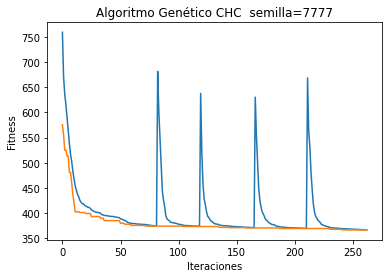

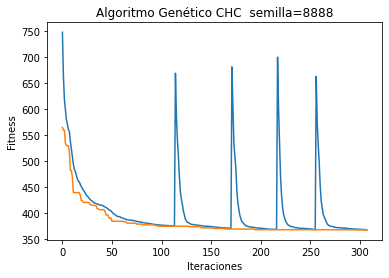

In [ ]:
#Realizamos el plot de los valores historicos
for semilla in semillas:

  media = dictsem[semilla]["hist_media"]
  mejor = dictsem[semilla]["hist_mejor"]

  x = [i for i in range(len(media))]
  plt.plot(x,media, label = 'media de costes')
  plt.plot(x,mejor, label = 'mejor coste')
  plt.xlabel('Iteraciones')
  plt.ylabel('Fitness')
  plt.title('Algoritmo Genético CHC '+' semilla='+str(semilla))
  plt.show()

In [ ]:
print(np.random.normal(15,2))

19.12098390287649


## ALGORITMO GENETICO MUTIMODAL

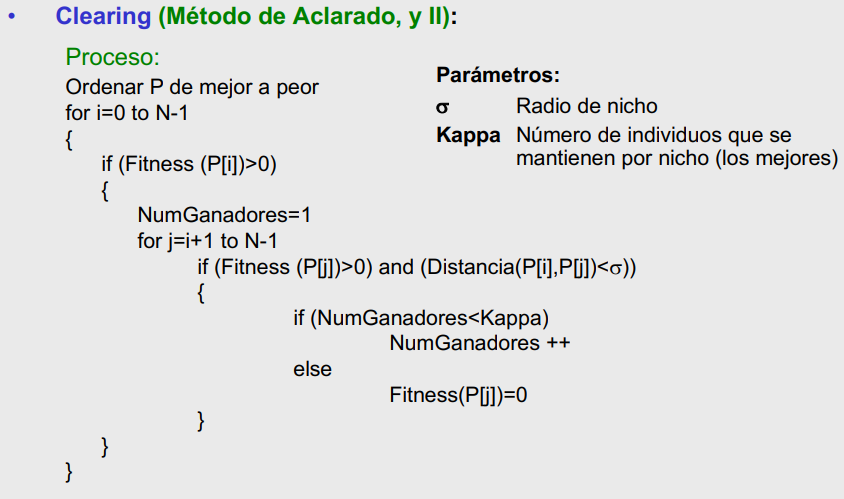

In [ ]:

#ALGORITMO GENÉTICO MULTIMODAL

dictcost_est = {}
dictsem = {}

ini_multi = time.time()

for semilla in semillas:

  random.seed(semilla)

  contador_fitness = 0
  hist_media = []
  hist_mejor = []

  # Definimos los operadores

  gen_sin_mejora = 0
  limite_sin_mejora = 100
  #prob_mut = random.uniform(0.05,0.2)
  prob_mut = 0.1
  granularidad = 3
  k = 0.1
  P = 15
  kappa = 3
  radio = 3


  #Creamos la poblacion inicial:

  #Tamaño pob. Inicial: Entre 15 y 30 individuos
  #pob_inicial = random.randint(15,30)
  pob_inicial = 30
  pob = np.empty((pob_inicial, num_estaciones), int)

  for i in range(pob_inicial):
    ind = crea_estaciones_random()
    pob[i] = ind


  #Calculamos los costes de la poblacion
  cost_pob = np.zeros(len(pob))

  for i in range(len(pob)):
    cost_pob[i] = func_fitness(pob[i])
    contador_fitness += 1

  generacion=0
  cont_p = 0

  mejor_anterior = sys.maxsize

  while gen_sin_mejora < limite_sin_mejora:

    if mejor_anterior <= min(cost_pob):
      gen_sin_mejora += 1
    else:
      gen_sin_mejora = 0

    mejor_anterior = min(cost_pob)

    cont_p += 1
    generacion += 1

    print("Gen: " + str(generacion))
    print("Mejores costes: ",np.sort(cost_pob)[0:5])

    #Seleccionamos la elite:
    ind_elite = np.argsort(cost_pob)[0:5] #elite de 5 individuos
    elite = pob[ind_elite]
    print("Mejor solucion:",pob[np.argsort(cost_pob)[0]]," con suma de estaciones ", sum(pob[np.argsort(cost_pob)[0]]))

    #Añadimos la media de valores y el mejor valor
    hist_mejor.append(min(cost_pob))
    hist_media.append(np.mean(cost_pob))


    #Generamos la nueva poblacion:
    new_pob = np.copy(pob)
    new_pob[0:5] = elite #Mantenemos la elite

    for i in range(len(pob) - 5):

      #Realizamos la seleccion por torneo
      padres = sel_torneo(pob, cost_pob, k)

      #Operador de cruce
      hijo = cruce(padres)

      #Mutacion
      if(np.random.random() < prob_mut): 
        hijo = mutacion(hijo, granularidad)

      new_pob[i+5] = hijo

    pob = np.copy(new_pob)
    cost_pob = np.zeros(len(pob))
    for i in range(len(pob)):
      cost_pob[i] = func_fitness(pob[i])
      contador_fitness += 1

    #Realizamos el aclarado
    if cont_p >= P:
      print("***CLEARING***")
      cont_p = 0
      pob,cost_pob = clearing(pob.copy(),cost_pob.copy(),kappa,radio)

    
  ind_mejor = np.argsort(cost_pob)[0] 
  mejor = pob[ind_mejor]
  dictcost_est["sol"] = mejor.copy()
  dictcost_est["coste"] = min(cost_pob)
  dictcost_est["num_ev"] = contador_fitness
  dictcost_est["hist_mejor"] = hist_mejor
  dictcost_est["hist_media"] = hist_media

  dictsem[semilla] = dictcost_est.copy()

fin_multi = time.time()

time_multi = fin_multi - ini_multi

print(dictsem)
  

Gen: 1
Mejores costes:  [543.99503992 551.49275246 566.58951442 573.73915684 579.96944897]
Mejor solucion: [10 14 14 14  7 14 14  3 17 24 17 24 14  7 17 10]  con suma de estaciones  220
Gen: 2
Mejores costes:  [526.26935804 532.31335369 535.38823933 543.99503992 551.49275246]
Mejor solucion: [13  5 22 15 15 13 20  3 17 24 17 24 14  7 17 10]  con suma de estaciones  236
Gen: 3
Mejores costes:  [487.51060496 526.26935804 530.98327045 532.31335369 535.38823933]
Mejor solucion: [10 14 10 14 11  5 24 13 11 28 17 24 14  7 17 10]  con suma de estaciones  229
Gen: 4
Mejores costes:  [487.51060496 526.26935804 530.98327045 532.31335369 533.96465986]
Mejor solucion: [10 14 10 14 11  5 24 13 11 28 17 24 14  7 17 10]  con suma de estaciones  229
Gen: 5
Mejores costes:  [487.51060496 507.68689086 526.26935804 530.98327045 532.31335369]
Mejor solucion: [10 14 10 14 11  5 24 13 11 28 17 24 14  7 17 10]  con suma de estaciones  229
Gen: 6
Mejores costes:  [487.51060496 507.68689086 526.26935804 530.98

In [ ]:
costes = []
evaluaciones = []

for coste_ev in dictsem.values():
  costes.append(coste_ev["coste"])
  evaluaciones.append(coste_ev["num_ev"])

mejor_coste = min(costes)
mejor_ev = min(evaluaciones)

media_coste = np.mean(costes)
media_ev = np.mean(evaluaciones)

desv_coste = np.std(costes)
desv_ev = np.std(evaluaciones)

df_results.loc["AG Multimodal"] = [mejor_ev,media_ev,desv_ev,mejor_coste,media_coste,desv_coste,time_multi]

print(df_results)

                Ev.Mejor  Ev.Media  Ev.Desv   Kms.Mejor   Kms.Media  \
Busqueda Local     267.0     269.0      2.0  393.600295  406.397602   
VNS               2287.0    2288.0      1.0  381.366246  399.530033   
AG Basico         5025.0    5025.0      0.0  376.749330  382.785894   
AG CHC           23761.0   30268.0   6507.0  367.007364  367.065195   
AG Multimodal     7200.0    7937.5    737.5  386.452129  391.381915   

                 Kms.Desv      tiempo  
Busqueda Local  12.797307    5.310954  
VNS             18.163786   44.661613  
AG Basico        6.036564   80.624681  
AG CHC           0.057831  557.158539  
AG Multimodal    4.929787  142.088811  


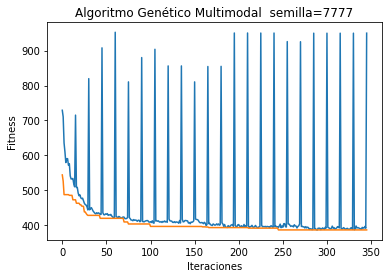

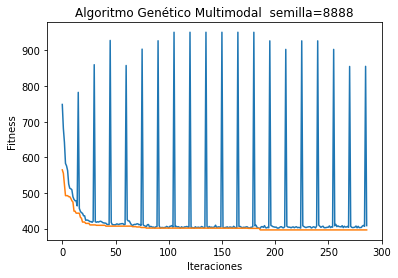

In [ ]:
#Realizamos el plot de los valores historicos
for semilla in semillas:

  media = dictsem[semilla]["hist_media"]
  mejor = dictsem[semilla]["hist_mejor"]

  x = [i for i in range(len(media))]
  plt.plot(x,media,label = "media de costes")
  plt.plot(x,mejor, label = "mejor coste")
  plt.xlabel('Iteraciones')
  plt.ylabel('Fitness')
  plt.title('Algoritmo Genético Multimodal '+' semilla='+str(semilla))
  plt.show()

# EXPORTACION DE LOS DATOS A UN CSV

In [ ]:
df_results.to_csv("dataframe.csv", decimal='.', float_format='%.3f')